# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [12]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:12<00:00, 1517.20it/s]


In [13]:
# Combining all the preprocessing steps.
def preprocess_text_col(text_col):
    
    from tqdm import tqdm_notebook
    preprocessed_essays = []
    
    # tqdm is for printing the status bar
    for sentence in tqdm_notebook(text_col.values):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    
    return preprocessed_essays

## 1.5 Preparing data for models

In [14]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.3 Vectorizing Numerical features

In [15]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [16]:
#Standardize price and number of previously posted projects.
from sklearn.preprocessing import StandardScaler

project_data['price'] = StandardScaler().fit_transform(project_data['price'].values.reshape(-1, 1))
project_data['teacher_number_of_previously_posted_projects'] = StandardScaler().fit_transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

/home/veganwearbrand_gmail_com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/home/veganwearbrand_gmail_com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Setting X and Y</h2>

In [17]:
y_train = project_data['project_is_approved']
train_data = project_data

<h2>2.2 Make Data Model Ready: Preprocessing Text Data</h2>

In [18]:
#Preprocessing essays
preprocessed_essays_train=preprocess_text_col(train_data['essay'])

#Preprocessing titles.
preprocessed_titles_train=preprocess_text_col(train_data['project_title'])

<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [19]:
#Preprocessing train data.
from scipy.sparse import hstack
from category_encoders import TargetEncoder

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.

vectorizer_categories = TargetEncoder()
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values, y_train)

vectorizer_sub_categories = TargetEncoder()
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values, y_train)

vectorizer_state = TargetEncoder()
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values, y_train)

vectorizer_grade = TargetEncoder()
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values, y_train)

vectorizer_prefix = TargetEncoder()
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values, y_train)

#Text data.

vectorizer = CountVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)

vectorizer_titles = CountVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [20]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re_pre, y_train_re_pre = rus.fit_resample(x_train, y_train)

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5000)
svd = svd.fit(x_train_re_pre)

x_train_re = svd.transform(x_train_re_pre)

<h2>2.5 Apply Kmeans</h2>

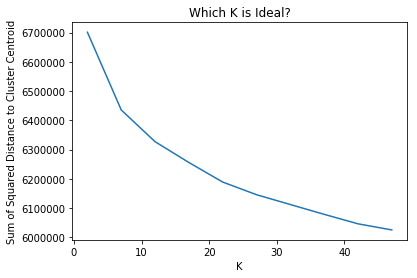

In [23]:
#Plot hyperparamater tuning of K versus distance to find best K.
from sklearn.cluster import KMeans
inertia = []

for i in range(2,50,5):
    clf = KMeans(n_clusters=i, init = 'k-means++', n_jobs = -1).fit(x_train_re)
    inertia.append(clf.inertia_)

num_features = range(2, 50, 5)

plt.xlabel('K')
plt.ylabel('Sum of Squared Distance to Cluster Centroid')
plt.title('Which K is Ideal?')
plt.plot(num_features, inertia)

In [24]:
#For this assignment, we will use 7 clusters. The steepest drop is from 2 to 7.
#While we could use a larger number, it would make it infeasible to generate then review sample points and word clouds
#for 40+ clusters. It would also make them less useful to predicting whether a project will be approved or not (binary decision).

clf = KMeans(n_clusters=7, init = 'k-means++', n_jobs = -1).fit(x_train_re)

In [26]:
#Manually check a few points from each cluster.

print("Cluster 0:")
print("***************")
for i in range(0,20):
    if clf.labels_[i] == 0:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 1:")
print("***************")
for i in range(0,20):
    if clf.labels_[i] == 1:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 2:")
print("***************")
for i in range(0,20):
    if clf.labels_[i] == 2:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 3:")
print("***************")
for i in range(0,20):
    if clf.labels_[i] == 3:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 4:")
print("***************")
for i in range(0,30):
    if clf.labels_[i] == 4:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 5:")
print("***************")
for i in range(0,30):
    if clf.labels_[i] == 5:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 6:")
print("***************")
for i in range(0,30):
    if clf.labels_[i] == 6:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")

Cluster 0:
***************
Point 4:
Our second grade classroom next year will be made up of around 25 kids, many of them coming from Spanish-speaking families, many of them receive free or reduced priced lunch. These are inquisitive students, who often do not have as many educational resources at home as they need.\r\n These kids are curious about the world, excited to learn, and ready to find out all that an education can offer them. I'm excited to teach them and push them to meet and exceed any expectations they have of themselves.For many students, math is a subject that does not pertain to life, a subject that stresses them out. I believe in making math not only fun, but also important to their lives. A typical part of the day is our \"Calendar Math\" section, which is a time in which we talk about the calendar, the weather, and about the properties of the day. \r\nThese Calendar Math Journals will allow each student to be more accountable for their own learning. It will help them 

In [27]:
#Separate points by cluster for generating word cloud.
#Source: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion

#Transforming train_data to only include samples selected by RandomUnderSampler (to match indices).
train_data = train_data.iloc[rus.sample_indices_]

#Create boolean mask and use it to filter for each sluter.
cluster0 = train_data['essay'][(clf.labels_ == 0)]
cluster1 = train_data['essay'][(clf.labels_ == 1)]
cluster2 = train_data['essay'][(clf.labels_ == 2)]
cluster3 = train_data['essay'][(clf.labels_ == 3)]
cluster4 = train_data['essay'][(clf.labels_ == 4)]
cluster5 = train_data['essay'][(clf.labels_ == 5)]
cluster6 = train_data['essay'][(clf.labels_ == 6)]

#Preprocess text data.
cluster0_essays = preprocess_text_col(cluster0)
cluster1_essays = preprocess_text_col(cluster1)
cluster2_essays = preprocess_text_col(cluster2)
cluster3_essays = preprocess_text_col(cluster3)
cluster4_essays = preprocess_text_col(cluster4)
cluster5_essays = preprocess_text_col(cluster5)
cluster6_essays = preprocess_text_col(cluster6)

Here are the most common words used in essays in cluster 0.


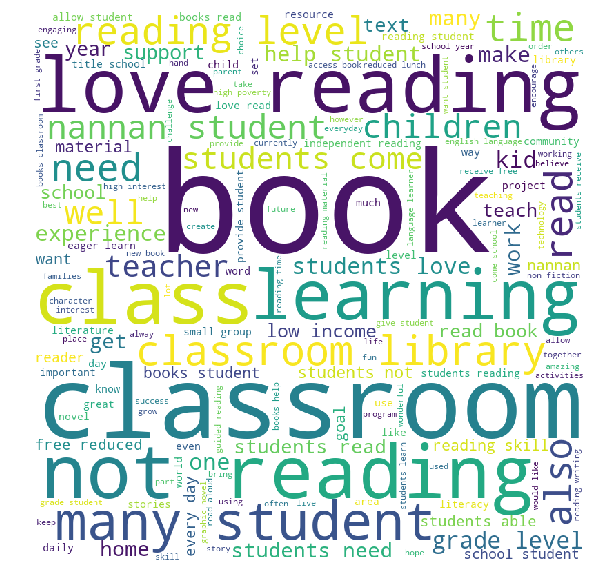

In [28]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster0_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 0.")
plt.show()

Here are the most common words used in essays in cluster 1.


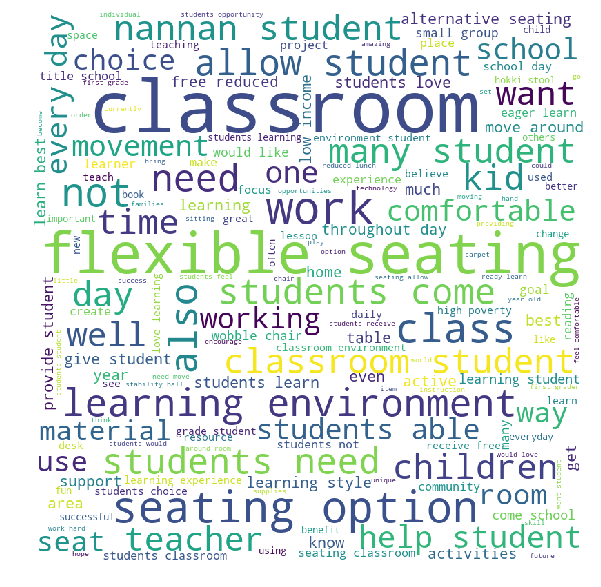

In [29]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster1_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 1.")
plt.show()

Here are the most common words used in essays in cluster 2.


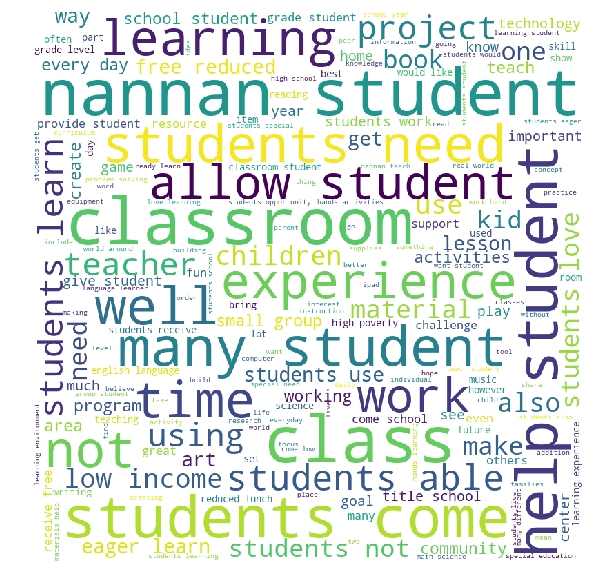

In [30]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster2_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 2.")
plt.show()

Here are the most common words used in essays in cluster 3.


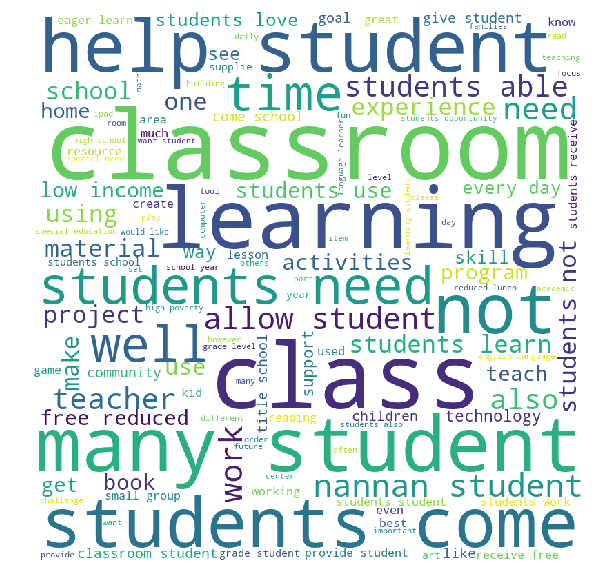

In [31]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster3_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 3.")
plt.show()

Here are the most common words used in essays in cluster 4.


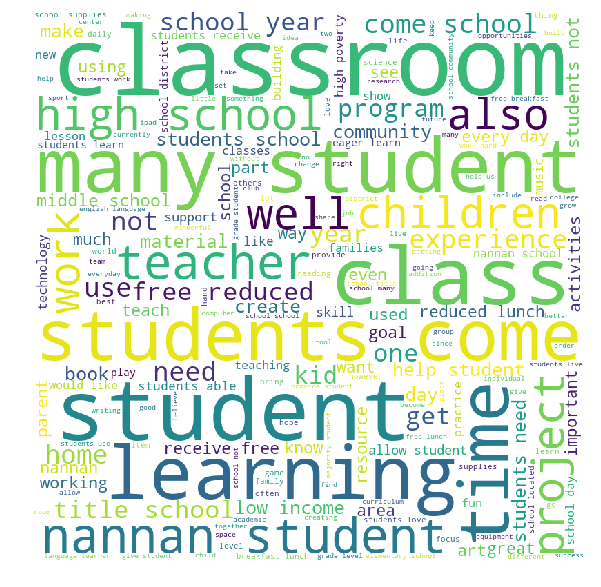

In [32]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster4_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 4.")
plt.show()

Here are the most common words used in essays in cluster 5.


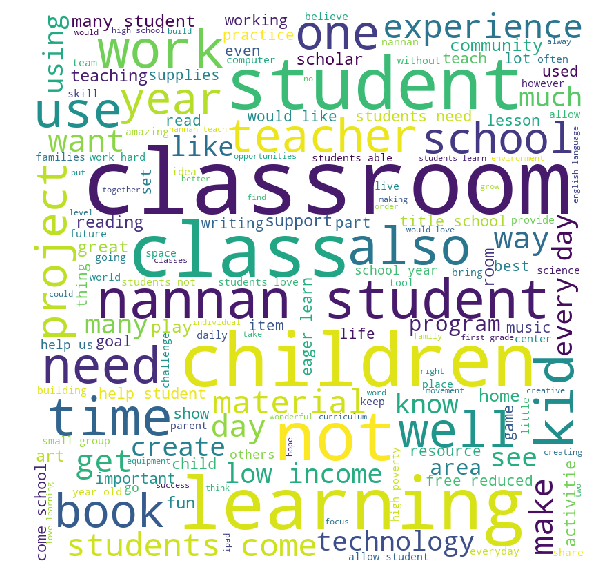

In [33]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster5_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 5.")
plt.show()

Here are the most common words used in essays in cluster 6.


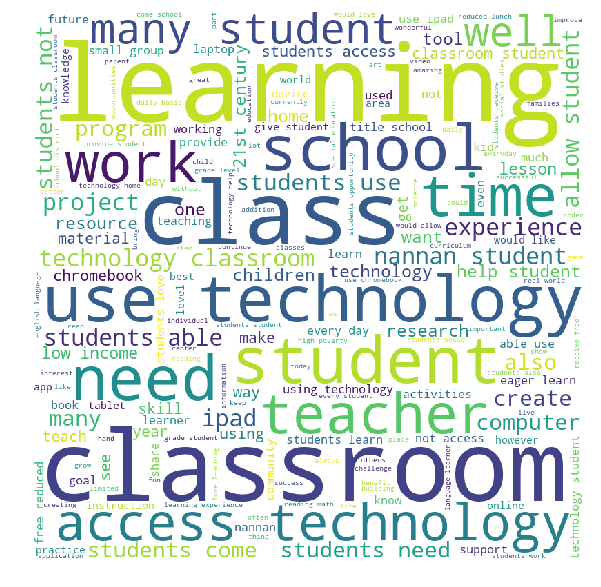

In [34]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster6_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 6.")
plt.show()

<h3>K-Means Summary</h3>

Due to the high dimensionality of the data, the relative distance between clusters is small. While 7 was picked as the best cluster size, it appears that K means may have broken the data into 7 equal shapes, despite the boundaries being somewhat arbitrary. This is visible by the fact that many words overlap between clusters, such as classroom, class, students, and technology. However, the high number of clusters resulted in some unique properties to each, such as "low income," "high school," and other properties omre unique to certain clusters.

Overall, it appears more clusters don't result in increase usefulness, so we should use fewer clusters for the next clustering techniques. The division by K-means also doesn't seem to result in distinct clusters, so another technique may work better.

<h2>2.6 Apply Agglomerative Clustering</h2>

In [17]:
#Reducing the size of the data for agglomerative clustering and DBSCAN, due to computational complexity.
n = project_data.shape[0]
train_size = 0.3

train_data = project_data.iloc[:int(n * train_size)]

y_train = project_data['project_is_approved']
y_train = y_train.iloc[:int(n * train_size)]

#Reprocess the essays and titles.
preprocessed_essays_train=preprocess_text_col(train_data['essay'])
preprocessed_titles_train=preprocess_text_col(train_data['project_title'])

In [18]:
#Preprocessing train data.
from scipy.sparse import hstack
from category_encoders import TargetEncoder

#Numerical data.
prev_projects_norm = train_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
price_norm = train_data['price'].values.reshape(-1,1)

#Categorical data.

vectorizer_categories = TargetEncoder()
categories_one_hot = vectorizer_categories.fit_transform(train_data['clean_categories'].values, y_train)

vectorizer_sub_categories = TargetEncoder()
sub_categories_one_hot = vectorizer_sub_categories.fit_transform(train_data['clean_subcategories'].values, y_train)

vectorizer_state = TargetEncoder()
state_one_hot = vectorizer_state.fit_transform(train_data['school_state'].values, y_train)

vectorizer_grade = TargetEncoder()
grade_one_hot = vectorizer_grade.fit_transform(train_data['project_grade_category'].values, y_train)

vectorizer_prefix = TargetEncoder()
prefix_one_hot = vectorizer_prefix.fit_transform(train_data['teacher_prefix'].values, y_train)

#Text data.

vectorizer = CountVectorizer(min_df=10)
essays = vectorizer.fit_transform(preprocessed_essays_train)

vectorizer_titles = CountVectorizer(min_df=10)
titles = vectorizer_titles.fit_transform(preprocessed_titles_train)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, grade_one_hot, prefix_one_hot, prev_projects_norm, price_norm, titles, essays))

In [19]:
#Balancing classes by undersampling, as there are already many rows of data for a KNN analysis.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

x_train_re_pre, y_train_re_pre = rus.fit_resample(x_train, y_train)

In [20]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5000)
svd = svd.fit(x_train_re_pre)

x_train_re = svd.transform(x_train_re_pre)

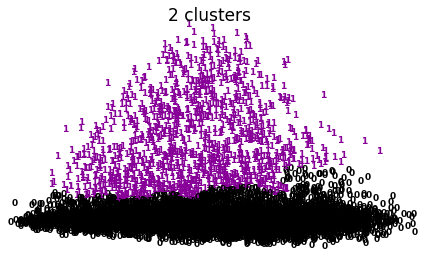

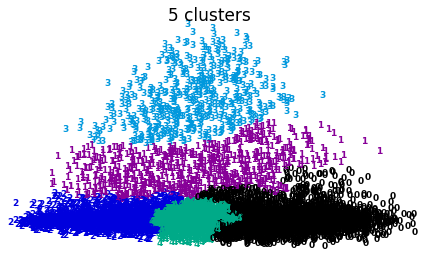

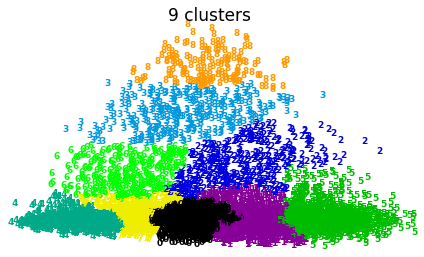

In [39]:
#Plot agglomerative clustering results.
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

n_samples, n_features = x_train_re.shape

np.random.seed(0)

#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(labels[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the dataset.
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(x_train_re)

from sklearn.cluster import AgglomerativeClustering

for i in [2,5,9]:
    clustering = AgglomerativeClustering(n_clusters = i)
    clustering.fit(X_red)
    plot_clustering(X_red, clustering.labels_, "%s clusters" % i)


plt.show()

In [40]:
#Plot agglomerative clustering with best division.
#2 seems to be the best number based on the graphs above, especially given we'd ideally want two clusters: approved and rejected projects.
clf = AgglomerativeClustering(n_clusters=2).fit(x_train_re)

In [41]:
#Manually check a few points from each cluster.

#Transforming train_data to only include samples selected by RandomUnderSampler (to match indices).
train_data = train_data.iloc[rus.sample_indices_]
#Reset index so that indices matches before and after undersampling.
train_data.reset_index(inplace = True)


print("Cluster 0:")
print("***************")
for i in range(0,15):
    if clf.labels_[i] == 0:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 1:")
print("***************")
for i in range(0,15):
    if clf.labels_[i] == 1:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")

Cluster 0:
***************
Point 0:
My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing thes

In [42]:
#Create boolean mask and use it to filter for each sluter.
cluster0 = train_data['essay'][(clf.labels_ == 0)]
cluster1 = train_data['essay'][(clf.labels_ == 1)]

#Preprocess text data.
cluster0_essays = preprocess_text_col(cluster0)
cluster1_essays = preprocess_text_col(cluster1)

Here are the most common words used in essays in cluster 0.


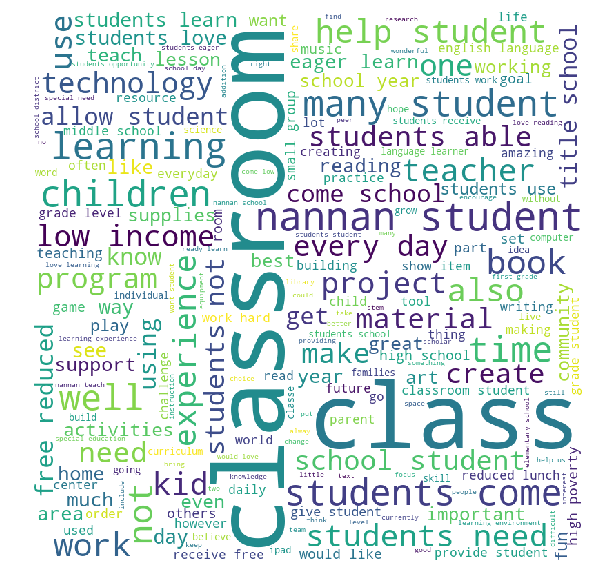

In [43]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster0_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 0.")
plt.show()

Here are the most common words used in essays in cluster 1.


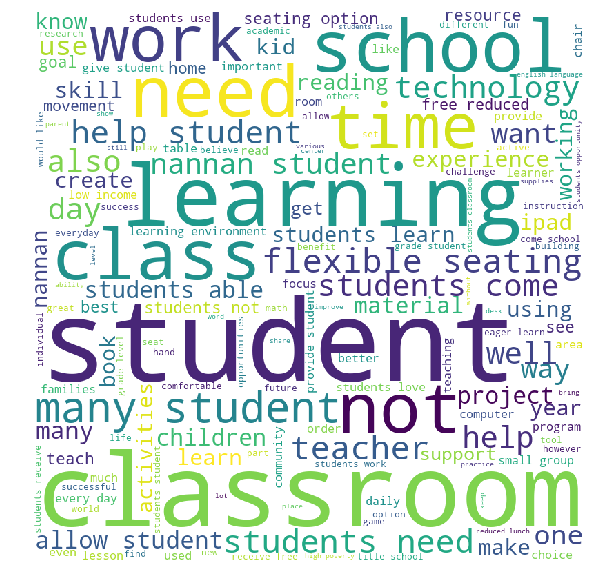

In [44]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster1_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 1.")
plt.show()

<h3>Agglomerative Clustering Summary</h3>

From the graph above plotting the data into 2 dimensions, it is visible that there are no distinct clusters. The closest visible boundary on the graph appears to be with 2 clusters, and that aligns with the goal of separating into approved and rejected project clusters, so I used 2 clusters.

The result was that the clusters are easier to understand. While both overlap with common words, we see unique words in each, such as cluster 0 having "students love" and "low-income." It would be good to review these clusters with the majority class label to give an idea of which words may be more used in approved projects.

However, due to the closeness of the data, any boundaries drawn are abritrary. We can pick 2 clusters, 3 clusters, or more, which would give us more information about the unique aspects of that cluster's projects, yet the distance between the clusters isn't enough to justify separating them. There is not a clear, distinct boundary.

<h2>2.7 Apply DBSCAN</h2>

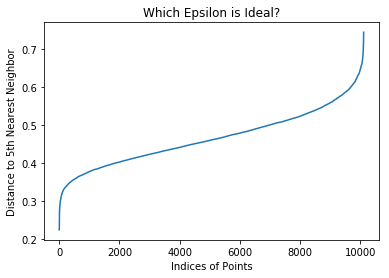

In [97]:
#Find the ideal Epsilon.
#Source: https://stackoverflow.com/questions/48010276/how-to-estimate-eps-using-knn-distance-plot-in-dbscan
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, metric = 'cosine', n_jobs = -1,).fit(x_train_re)
distances, indices = nbrs.kneighbors(x_train_re)
distanceDec = sorted(distances[:,4])

plt.xlabel('Indices of Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('Which Epsilon is Ideal?')
plt.plot(list(range(0,x_train_re.shape[0])), distanceDec)

In [107]:
#Creating DBSCAN model with best Epsilon.
#From the elbow graph, this appears to be .5 (where graphs slopes upward).
#We need a slightly lower number to prevent the points from turning into one cluster.
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps = .5, min_samples = 5, metric='cosine', n_jobs=-1).fit(x_train_re)

In [108]:
#Figuring out the number of clusters.
print(min(clf.labels_))
print(max(clf.labels_))

-1
1


In [114]:
#Manually check a few points from each cluster.

print("Cluster 0:")
print("***************")
for i in range(0,8):
    if clf.labels_[i] == 0:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")
        
print("Cluster 1:")
print("***************")
for i in range(0,4000):
    if clf.labels_[i] == 1:
        print("Point " + str(i) + ":")
        print(train_data['essay'][i])
        print("*******")

Cluster 0:
***************
Point 1:
\r\n\"True champions aren't always the ones that win, but those with the most guts.\" By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for the girls and boys soccer teams. The teams are made up of 7th and 8th grade students, and most of them have not had the opportunity to play in an organized sport due to family financial difficulties. \r\nI teach at a Title One middle school in an urban neighborhood. 74% of our students qualify for free and reduced lunch and many come from very activity/ sport opportunity-poor homes. My students love to participate in sports to learn new skills and be apart of team atmosphere. My school lacks the funding to meet my students’ needs and I am concerned that their lack of exposure will not prepare them for the participating in sports and teams in high school. By the end of the school year, the goal is to provide our students with an opportunity to learn 

In [115]:
#Create boolean mask and use it to filter for each sluter.
cluster0 = train_data['essay'][(clf.labels_ == 0)]
cluster1 = train_data['essay'][(clf.labels_ == 1)]

#Preprocess text data.
cluster0_essays = preprocess_text_col(cluster0)
cluster1_essays = preprocess_text_col(cluster1)

Here are the most common words used in essays in cluster 0.


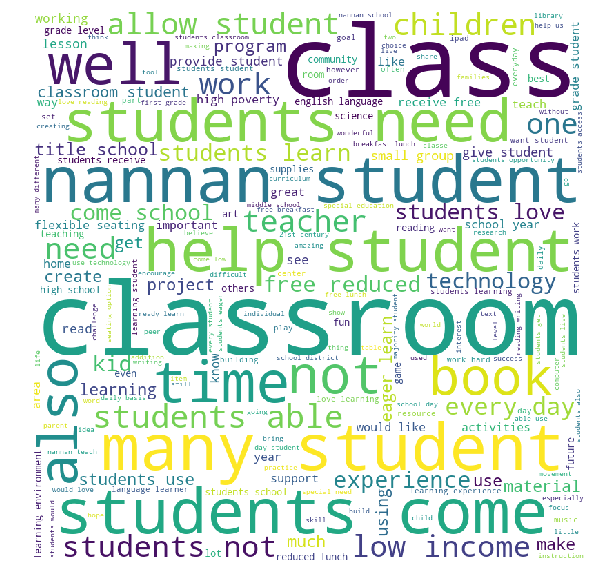

In [116]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster0_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 0.")
plt.show()

Here are the most common words used in essays in cluster 1.


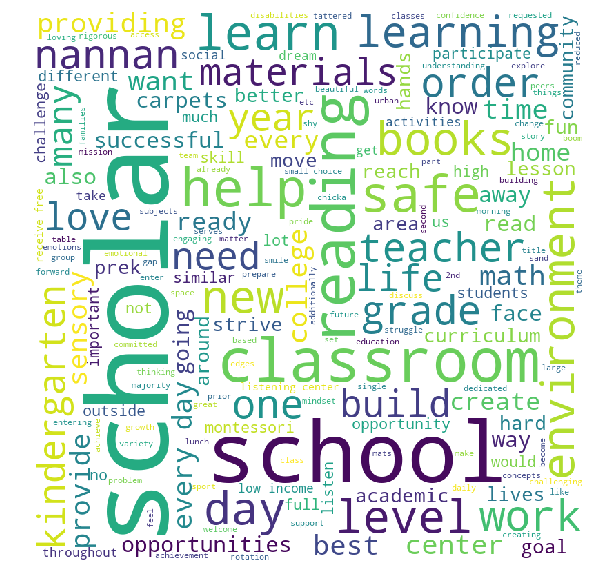

In [118]:
# Python program to generate word cloud for each cluster.
#Source for Word Cloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
#Source for getting word dictionary: https://stackoverflow.com/questions/8478602/convert-a-list-of-string-sentences-to-words
from wordcloud import WordCloud

words_cloud = [word for line in cluster1_essays for word in line.split()]
comment_words = ' '

for words in words_cloud: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print("Here are the most common words used in essays in cluster 1.")
plt.show()

<h3>DBSCAN Summary</h3>

It appears that the data suffer from the curse of dimensionality, as no matter what hyperparameters were chosen, the data turned into 0 or 1 cluster, unless a slightly lower Epsilon was selected. The result was more points were classified as outliers, and the clusters were different sizes, yet clustering was possible.

The typical rule of thumb is setting "minimum points" equal to twice the number of dimensions (i.e. 5000), yet we did not have enough points to do so. In addition, the high number of dimensions resulted in most points being quite close. In the future, it may make sense to do this analysis with a smaller number of dimensions in order to see if the clusters are more separable.

<h1>3. Conclusions</h1>

Using K-means, agglomerative clustering, and DBSCAN, I separated the data into clusters.

For K-means, I selected 7 clusters. That resulted in low interpretability with higher cluster division. However, the clusters are reasonably close, so the information gained was small, since the words used were pretty similar across the board (e.g. classroom, class, student). Still, it may be possible to use the more unique words in each cluster with the cluster's majority class to see which types of projects are more likely to be approved.

For agglomerative clustering, I reduced the number of dimensions to 2 and plotted a graph. It was clear from the graph that agglomerative clustering would have trouble separating the clusters. The best possible boundary was wih 2 clusters. The clusters were close, but having two clusters allows us to examine the unique qualities of each more easily.

For DBSCAN, it was not possible to set the minimum points above the number of dimensions without creating one big cluster. In addition, due to the curse of dimensionality, the minimum versus maximum distances are pretty close, even when using cosine similarity. As a result, the only way to cluster the results was to set a low Epsilon to break the large cluster into smaller yet imbalanced ones, despite marking many points as outliers. I found a balance, and most points were included with a split of two clusters. My recommendation would be to reduce the number of features considered (e.g. to 500) to see if that results in a more clear distinction between clusters.

Among these three techniques, it appears that agglomerative clustering and DBSCAN both worked best to create distinct clusters. Future analysis could be done with fewer dimensions to see if clusters could be better-separated.